**1. Load & Prepare Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("diminos_data.csv")



In [2]:
# Convert to datetime
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

# Delivery time in minutes
df['delivery_time_mins'] = (
    df['order_delivered_at'] - df['order_placed_at']
).dt.total_seconds() / 60

# Remove negative / invalid values if any
df = df[df['delivery_time_mins'] > 0]


**2. Distribution of Delivery Time (With 31-min SLA Line)**

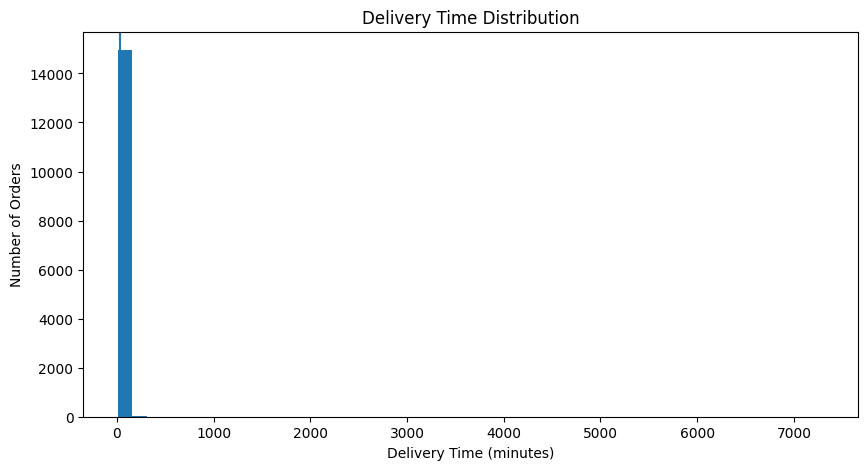

In [3]:
plt.figure(figsize=(10,5))
plt.hist(df['delivery_time_mins'], bins=50)
plt.axvline(31)
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.show()



Insight: Long tail shows why percentile matters more than average.

**3. Overall Percentile Visualization**

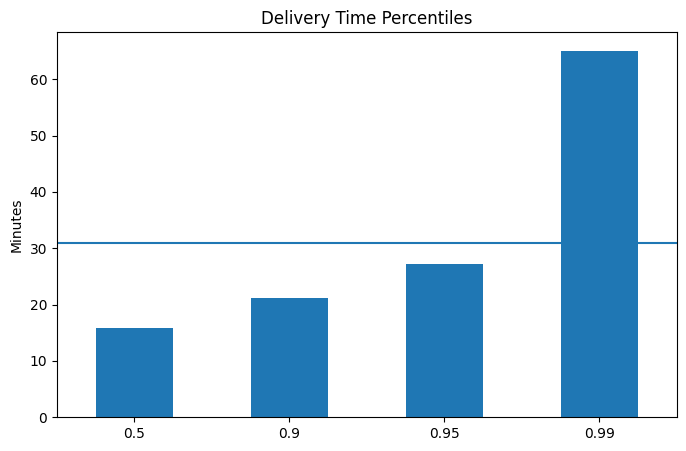

In [4]:
percentiles = df['delivery_time_mins'].quantile([0.5, 0.9, 0.95, 0.99])

plt.figure(figsize=(8,5))
percentiles.plot(kind='bar')
plt.axhline(31)
plt.title("Delivery Time Percentiles")
plt.ylabel("Minutes")
plt.xticks(rotation=0)
plt.show()


Insight: 95th percentile stays below SLA but 99th is risky.

**4. Hour-Wise 95th Percentile Analysis**

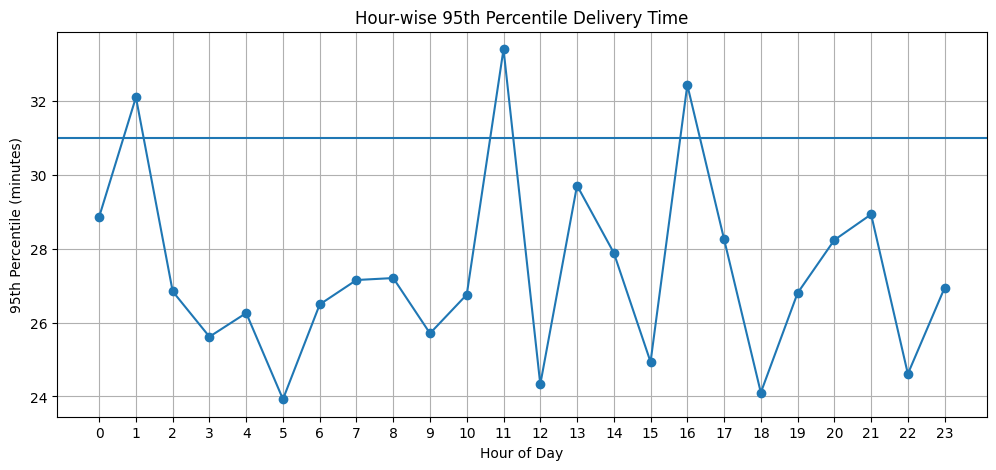

In [9]:
df['order_hour'] = df['order_placed_at'].dt.hour

hourly_95 = df.groupby('order_hour')['delivery_time_mins'].quantile(0.95)

plt.figure(figsize=(12,5))
hourly_95.plot(marker='o')
plt.axhline(31)
plt.title("Hour-wise 95th Percentile Delivery Time")
plt.xlabel("Hour of Day")
plt.ylabel("95th Percentile (minutes)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


Insight: Identify hours crossing 31 mins → operational risk

**5. % of Late Deliveries by Hour**

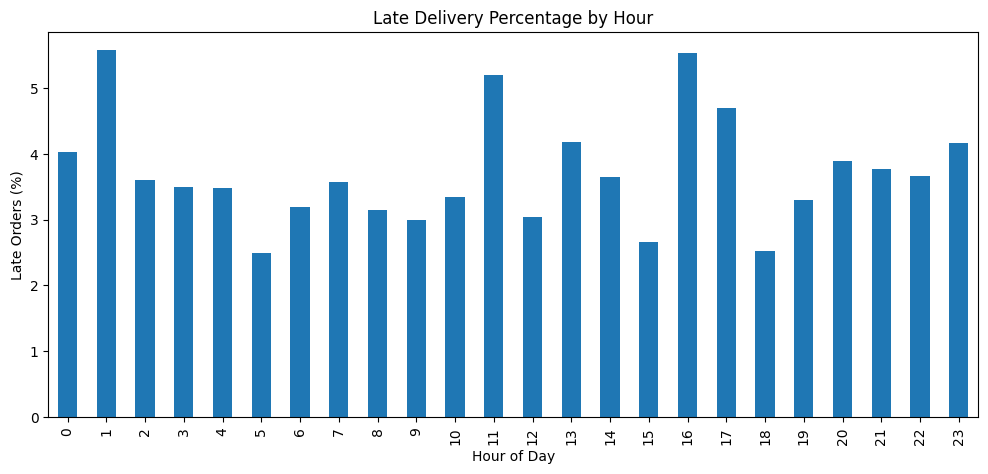

In [10]:
df['late'] = df['delivery_time_mins'] > 31

late_rate = df.groupby('order_hour')['late'].mean() * 100

plt.figure(figsize=(12,5))
late_rate.plot(kind='bar')
plt.title("Late Delivery Percentage by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Late Orders (%)")
plt.show()


 Insight: Shows when customers are most unhappy.

**6. Executive Summary Table**

In [11]:
summary = {
    "Average": df['delivery_time_mins'].mean(),
    "Median": df['delivery_time_mins'].median(),
    "95th Percentile": df['delivery_time_mins'].quantile(0.95),
    "% Orders > 31 mins": df['late'].mean() * 100
}

pd.DataFrame(summary, index=["Delivery Time (mins)"])


,Average,Median,95th Percentile,% Orders > 31 mins
Delivery Time (mins),20.499389,15.797986,27.261044,3.713333


**✅ Conclusion**

- The store’s overall delivery performance meets Diminos’ SLA, with the 95th percentile delivery time remaining below 31 minutes.

- Most orders are delivered well within the promised time, indicating strong operational efficiency under normal conditions.

- Time-based analysis reveals specific hours where delivery delays increase and the 95th percentile temporarily exceeds the SLA threshold.

- These delays are localized and operational in nature, not indicative of a systemic performance issue.

- Targeted interventions, such as optimizing staffing and improving preparedness during peak and late-night hours, can effectively mitigate these risks.

- With these adjustments, the store is well-positioned to maintain long-term SLA compliance and protect the franchise.